In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"]=(20, 10)
pd.set_option('display.float_format', lambda x: '%f' % x)

# Dataset

Used Cars Dataset
Vehicles listings from Craigslist.org

https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [2]:
cars = pd.read_csv('vehicles.csv')

In [3]:
cars.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.000000,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.000000,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.000000,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.000000,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.000000,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


# Dataset motivation

Motivation: Find price based on other attributes  
ML type: regression

# Visualization

In [4]:
def drop_columns(data_set, columns_to_drop: list):
    data_set.drop(columns_to_drop, axis='columns', inplace=True)

### Get rid of meta data

In [5]:
drop_columns(cars, ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'posting_date', 'lat', 'long'])

In [6]:
cars.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

### Some info about the dataset

In [7]:
cars.isnull().any()

id              False
region          False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
drive            True
size             True
type             True
paint_color      True
state           False
dtype: bool

In [8]:
cars.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Changing cylinder type to int

In [9]:
for i in range(16):
    cars['cylinders'].replace('{} cylinders'.format(i), i, inplace=True)

In [10]:
cars['cylinders'] = cars['cylinders'].fillna(0)
cars = cars[cars.cylinders != 'other']
cars['cylinders'] =  cars['cylinders'].astype(float).astype(int)
cars.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders         int32
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [11]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0,auburn,35990,2010.000000,chevrolet,corvette grand sport,good,8,gas,32742.000000,clean,other,rwd,NaN,other,NaN,al
1,1,auburn,7500,2014.000000,hyundai,sonata,excellent,4,gas,93600.000000,clean,automatic,fwd,NaN,sedan,NaN,al
2,2,auburn,4900,2006.000000,bmw,x3 3.0i,good,6,gas,87046.000000,clean,automatic,NaN,NaN,SUV,blue,al
3,3,auburn,2000,1974.000000,chevrolet,c-10,good,4,gas,190000.000000,clean,automatic,rwd,full-size,pickup,blue,al
4,4,auburn,19500,2005.000000,ford,f350 lariat,excellent,8,diesel,116000.000000,lien,automatic,4wd,full-size,pickup,blue,al


### Car production year distribution

<AxesSubplot:>

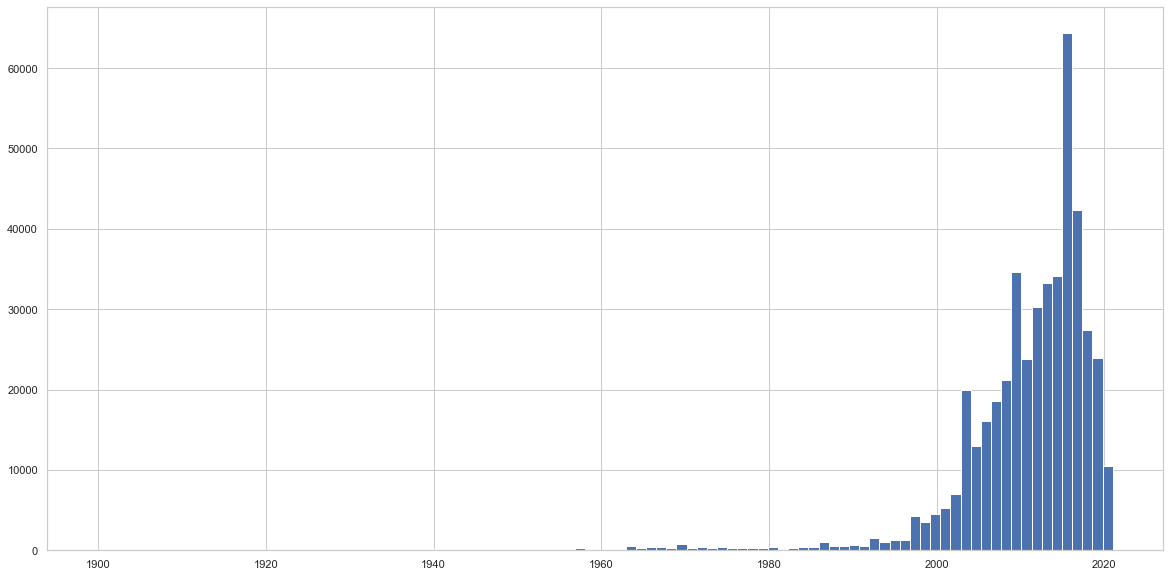

In [12]:
cars.year.hist(bins=100)

## Car price distribution

In [13]:
cars.price.isnull().any()

False

In [14]:
cars.price.describe()

count       457101.000000
mean         40481.004375
std        8204560.012696
min              0.000000
25%           4900.000000
50%          10995.000000
75%          21495.000000
max     3615215112.000000
Name: price, dtype: float64

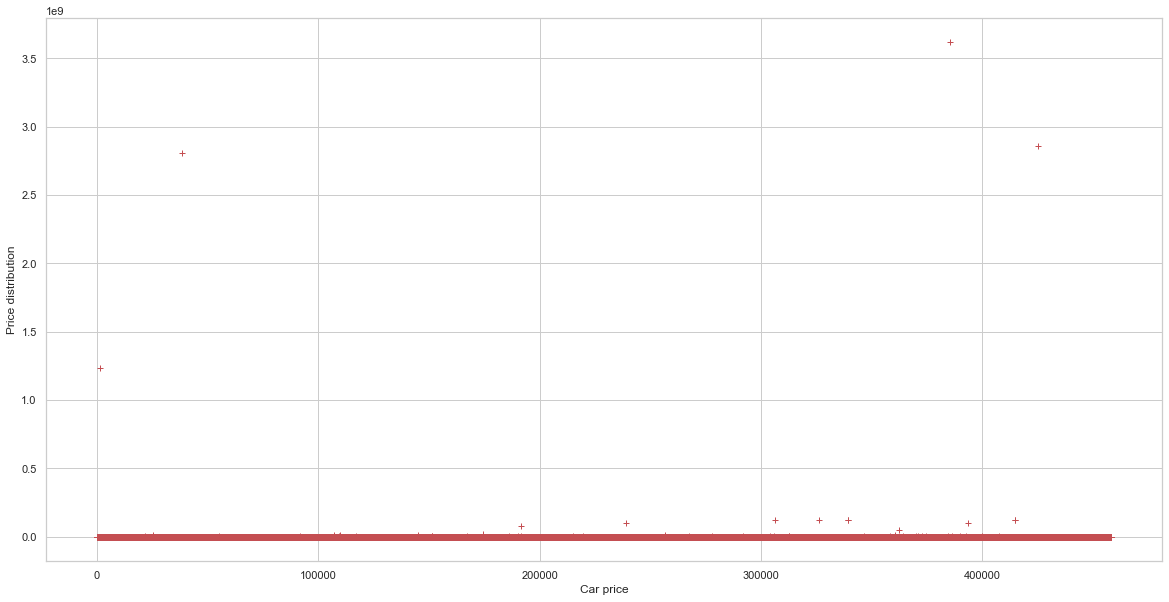

In [15]:
plt.plot(cars['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

### Price distribution under \$100k

<AxesSubplot:>

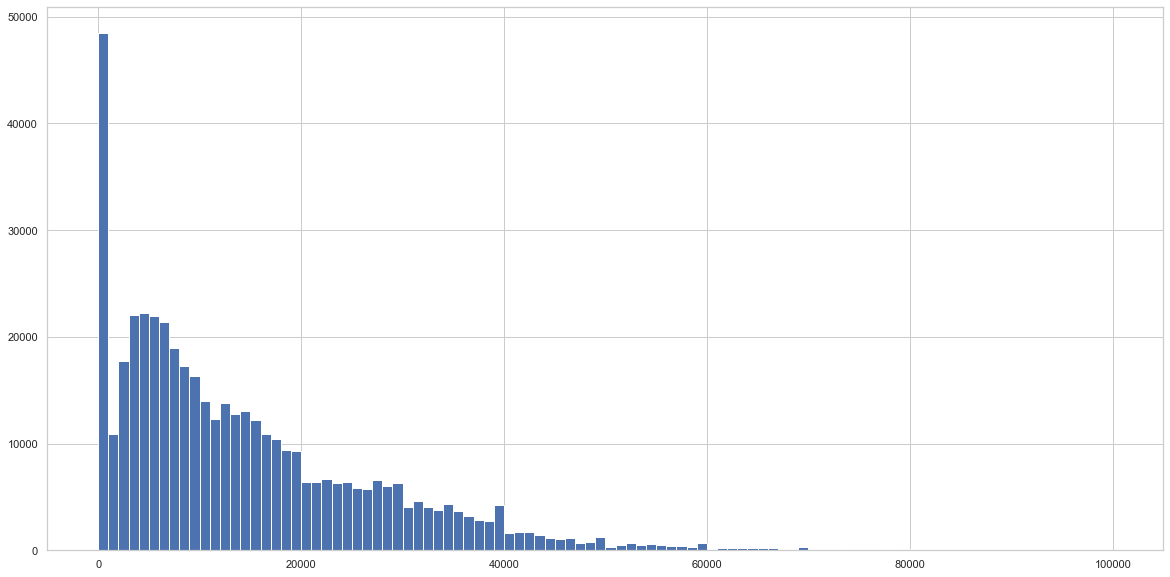

In [16]:
cars_under_100 = cars[cars.price < 100000]
cars_under_100.price.hist(bins=100)

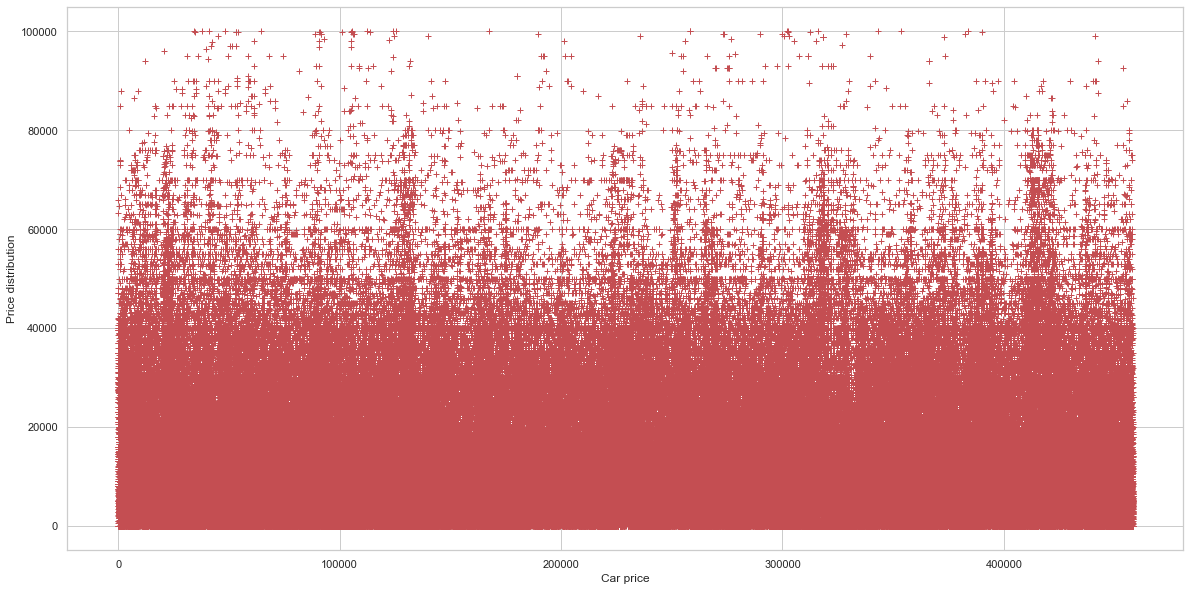

In [17]:
plt.plot(cars_under_100['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

### Removing cars without price

<AxesSubplot:>

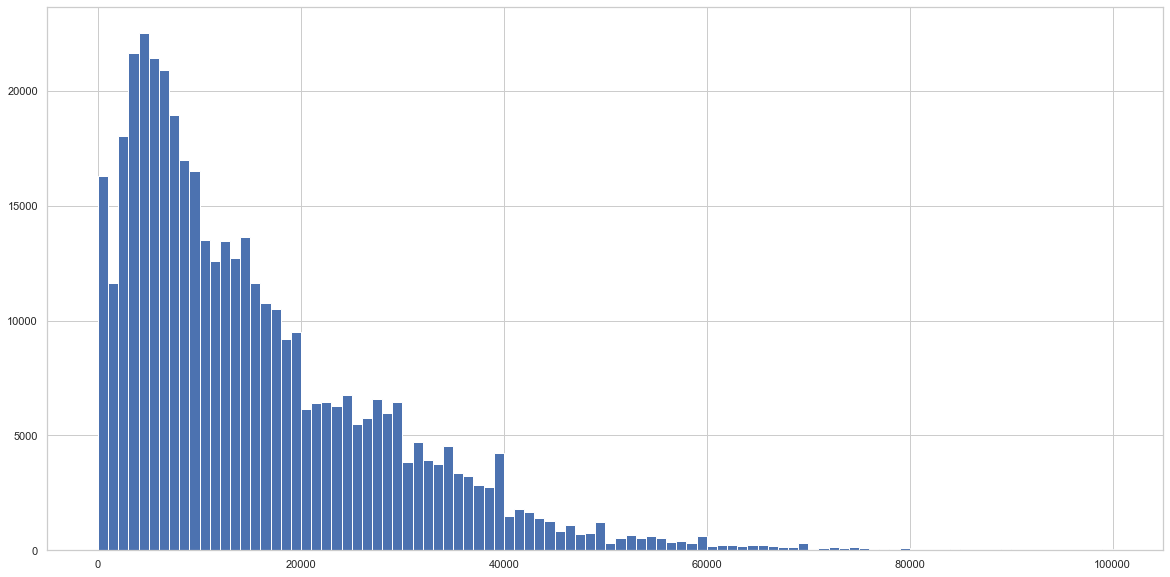

In [18]:
cars_under_100_over_0 = cars_under_100[cars_under_100.price > 0]
cars_under_100_over_0.price.hist(bins=100)

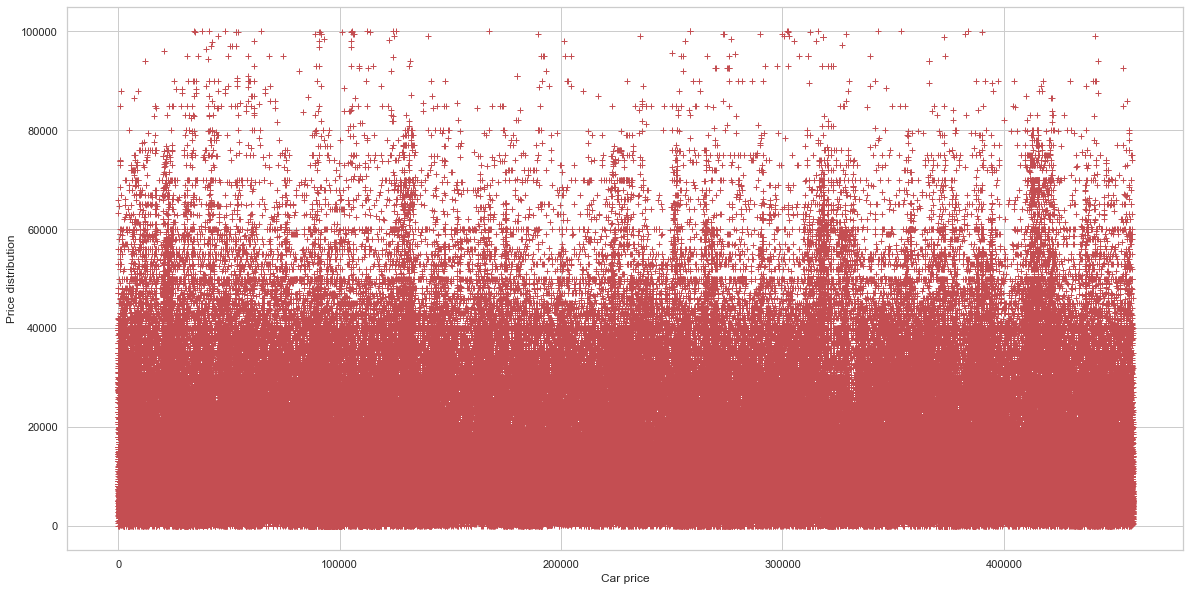

In [19]:
plt.plot(cars_under_100_over_0['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

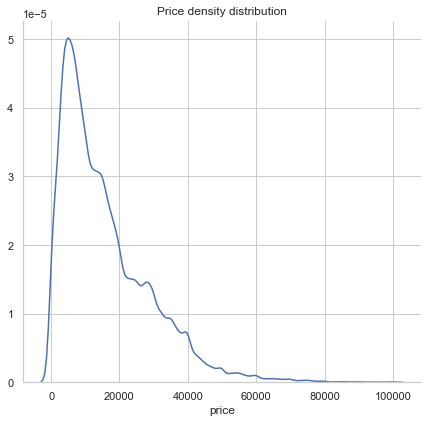

In [20]:
sns.FacetGrid(cars_under_100_over_0, height=6).map(sns.kdeplot, "price").add_legend()
plt.title('Price density distribution')
plt.show()

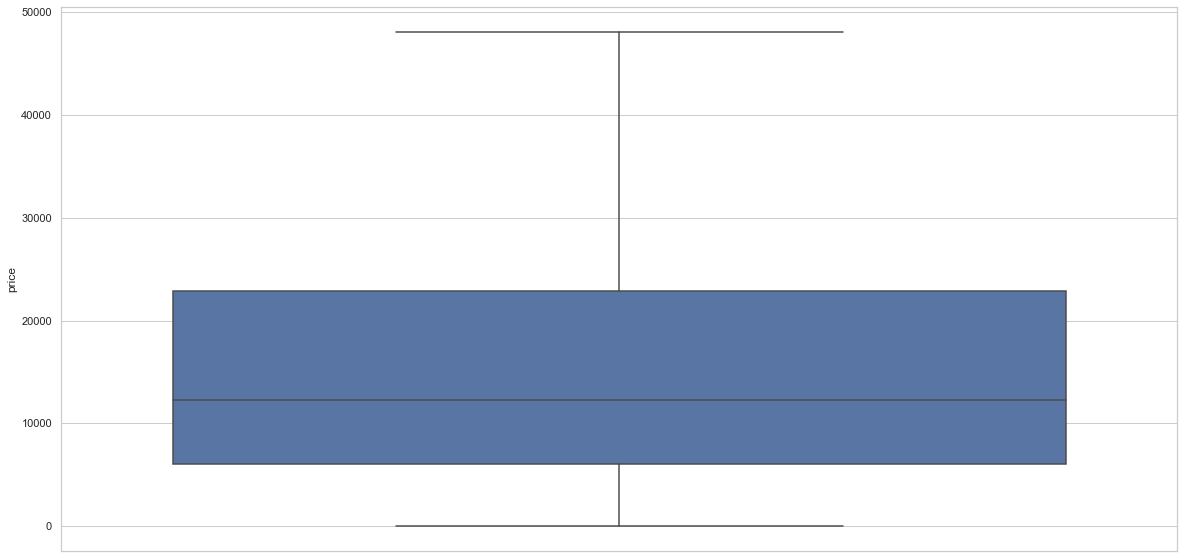

In [21]:
sns.boxplot(y='price', data=cars_under_100_over_0, showfliers=False)
plt.show()

#### Price based on condition

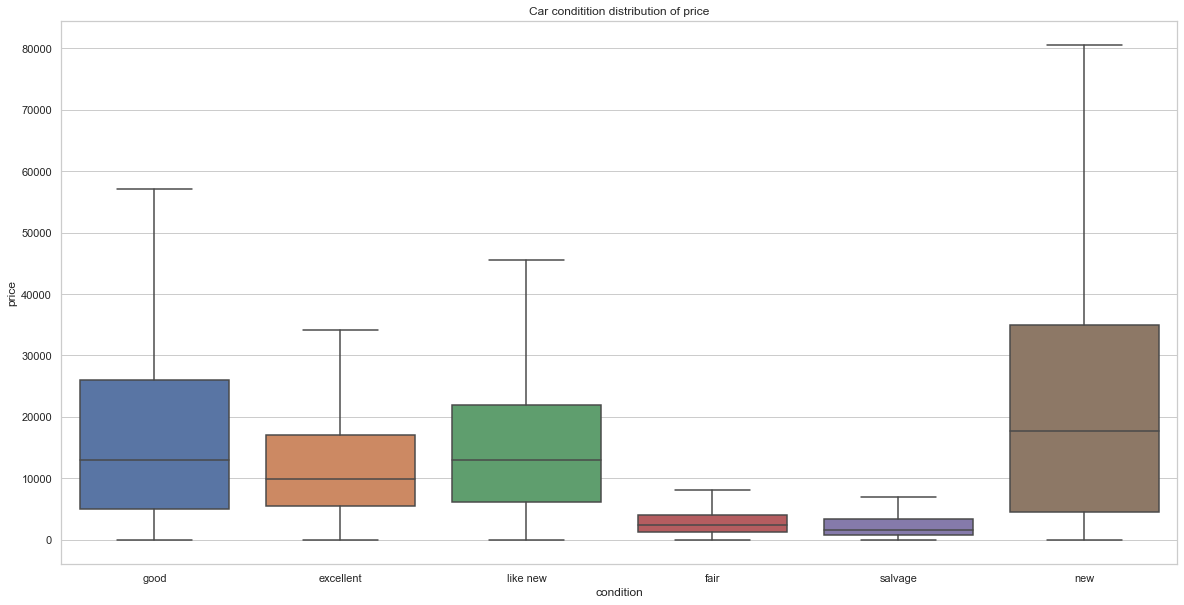

In [22]:
sns.set(style='whitegrid')
sns.boxplot(x='condition', y='price', data=cars, showfliers=False)
plt.title('Car conditition distribution of price')
plt.show()

#### Price based on title status

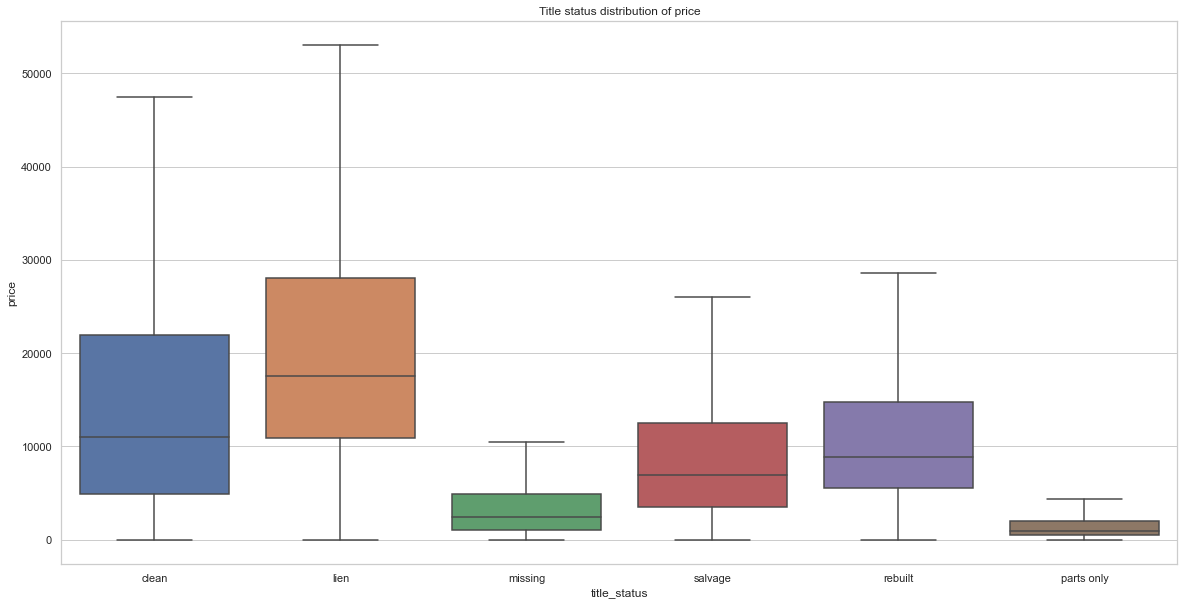

In [23]:
sns.set(style='whitegrid')
sns.boxplot(x='title_status', y='price', data=cars, showfliers=False)
plt.title('Title status distribution of price')
plt.show()

It might seem weird that cars with lien titles are more expensive than cars with clean titles.

Description from carmax: <blockquote>"A lienholder is most often the financial institution that holds the title on a car if the purchaser financed their vehicle purchase—rather than paying cash."</blockquote>

Lien title means the car is being used as collateral, so it's financed and not fully paid. If it's being financed right now it's probably new, so now it makes sense that they're more expensive.

Let's check production year vs title status.

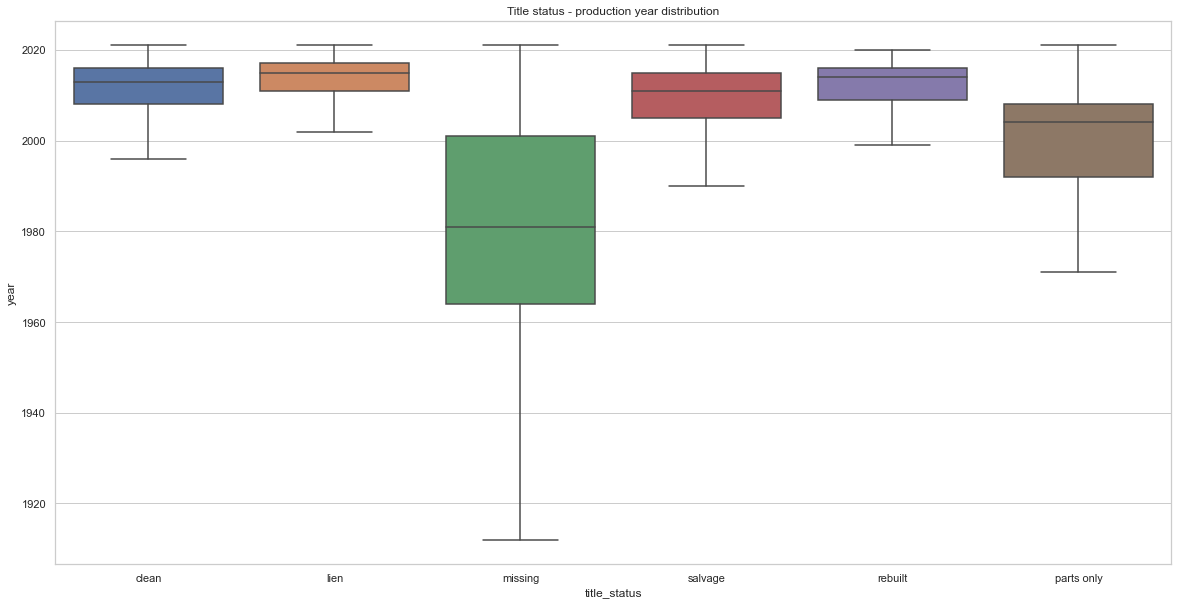

In [24]:
sns.set(style='whitegrid')
sns.boxplot(x='title_status', y='year', data=cars, showfliers=False)
plt.title('Title status - production year distribution')
plt.show()

Now we can confirm that cars with lien titles are newer, so it's natural that they are more expensive.

#### Median price based on manufacturer

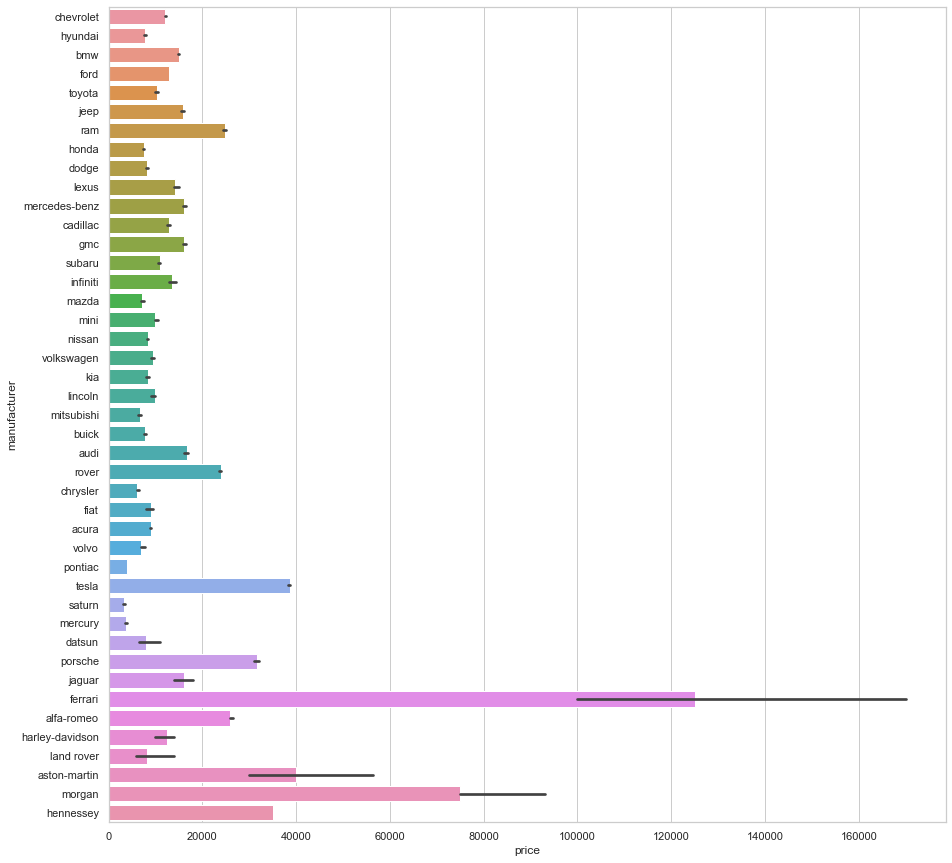

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(y='manufacturer', x='price', data=cars, estimator=np.median)
plt.show()

## Plot counts

In [26]:
def plot_count_ver(col, title):
    count = Counter(list(col))
    x, y = zip(*count.most_common())

    plt.bar(x, y, )
    for i, val in enumerate(y):
               plt.annotate(val, (x[i], y[i]), color='b')
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.grid(True, axis='y')
    plt.show()

### Car condition

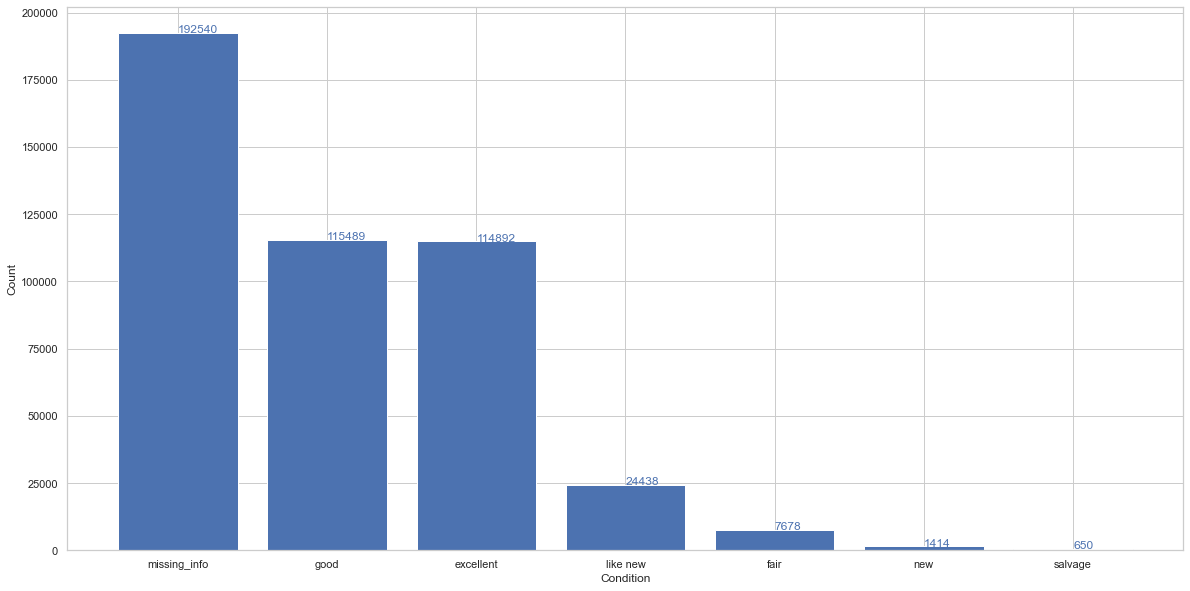

In [27]:
condition = cars.condition.replace(np.nan, 'missing_info')
plot_count_ver(condition, 'Condition')

### Cylinders

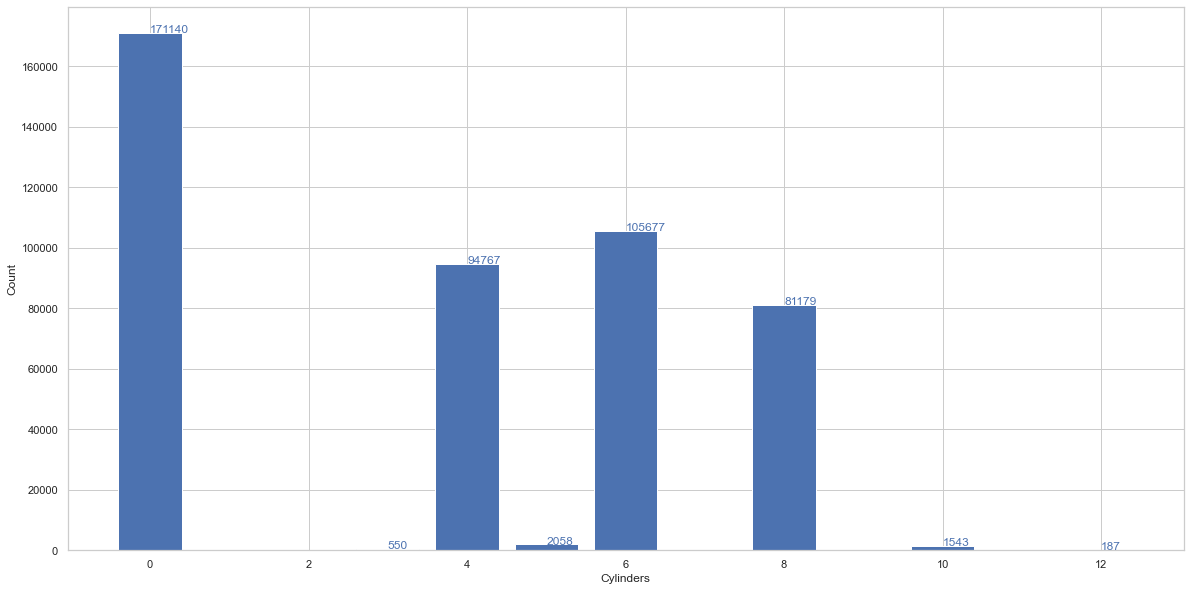

In [28]:
cylinders = cars.cylinders.replace(np.nan, 'missing_info')
plot_count_ver(cylinders, 'Cylinders')

### Fuel

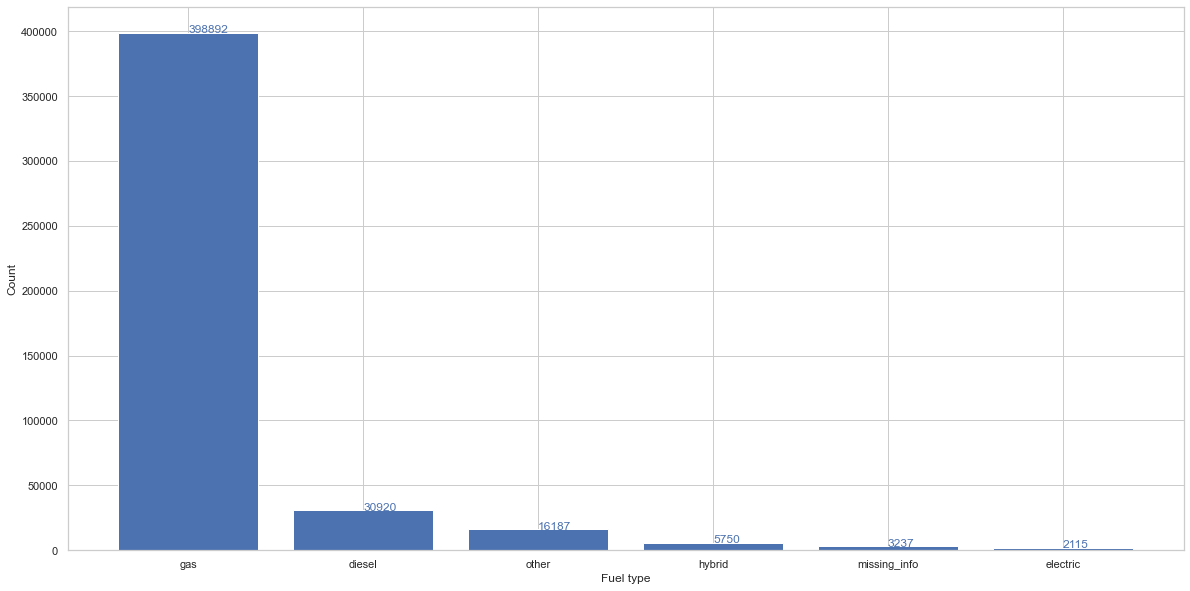

In [29]:
fuel = cars.fuel.replace(np.nan, 'missing_info')
plot_count_ver(fuel, 'Fuel type')

### Title status

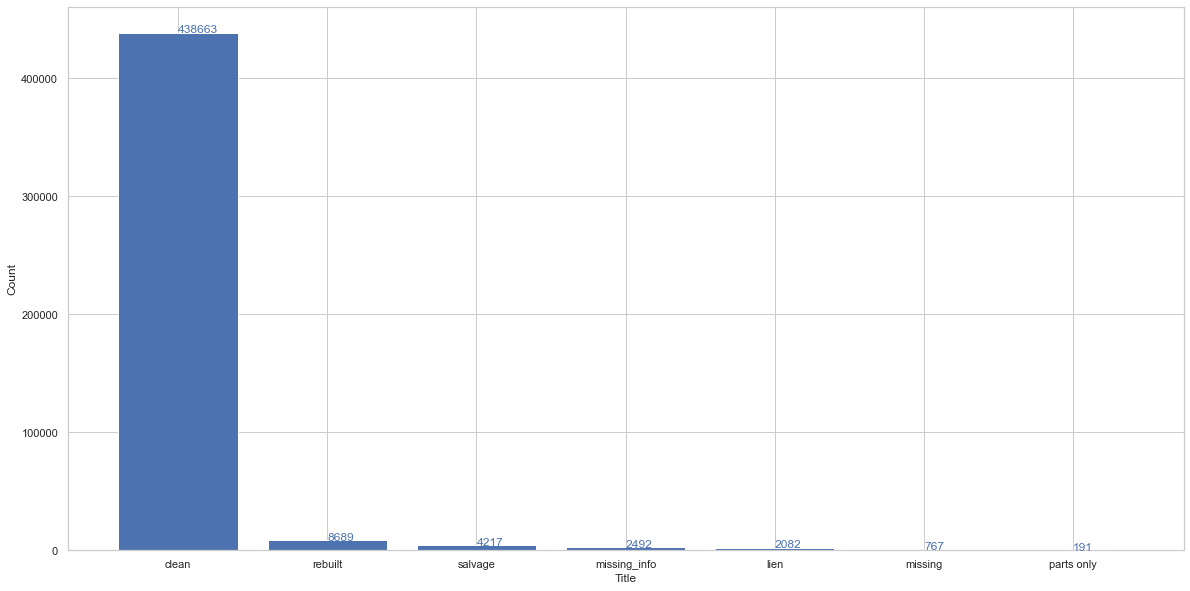

In [30]:
title_status = cars.title_status.replace(np.nan, 'missing_info')
plot_count_ver(title_status, 'Title')

Later I will remove records with title other than clean, as their price is based on different things.

### Transmission

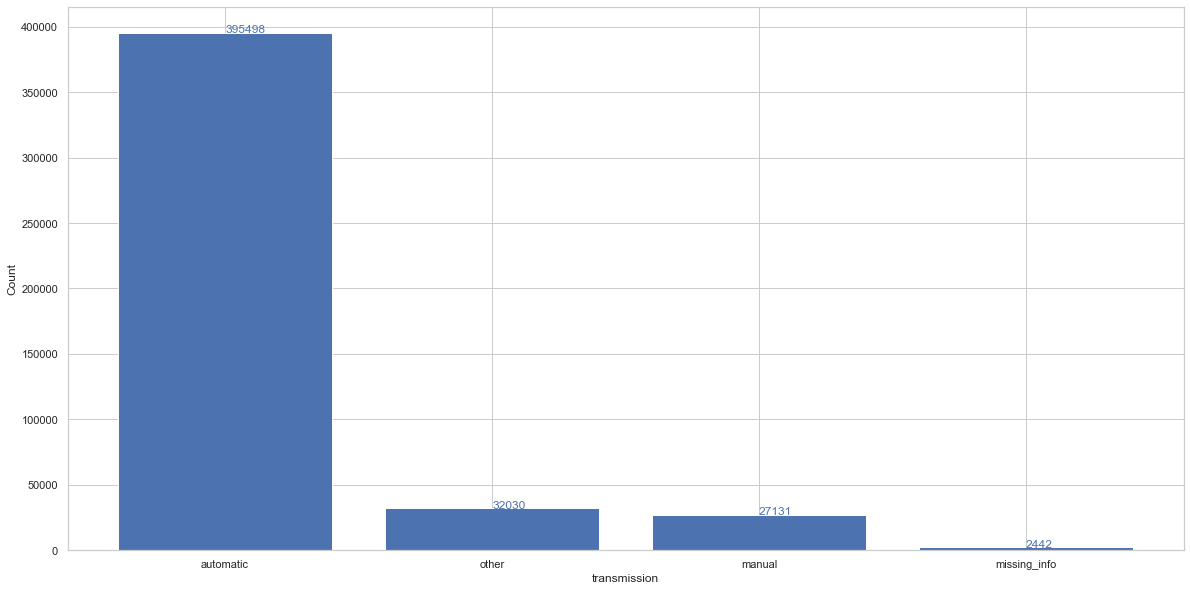

In [31]:
transmission = cars.transmission.replace(np.nan, 'missing_info')
plot_count_ver(transmission, 'transmission')

### Drive

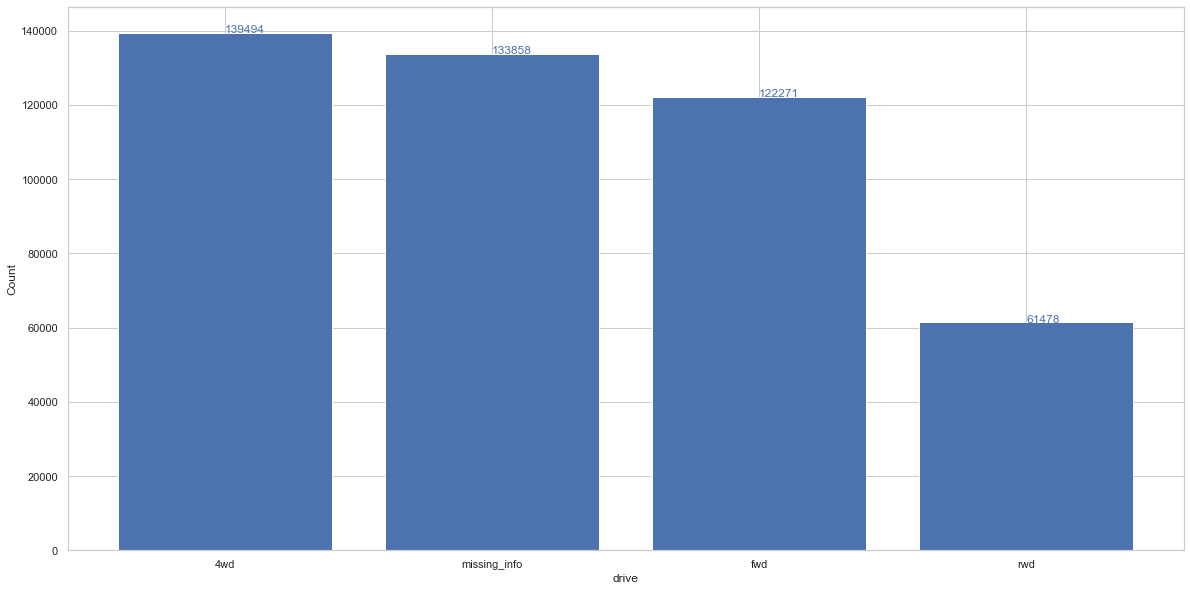

In [32]:
drive = cars.drive.replace(np.nan, 'missing_info')
plot_count_ver(drive, 'drive')

### Car size

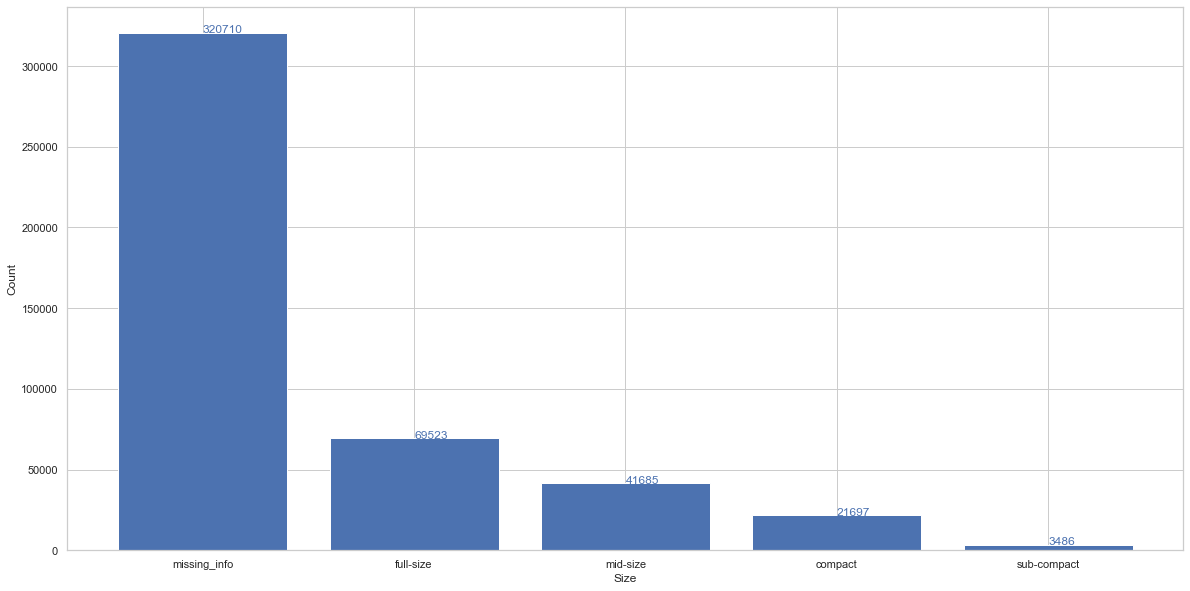

In [33]:
size = cars['size'].replace(np.nan, 'missing_info')
plot_count_ver(size, 'Size')

### Car type

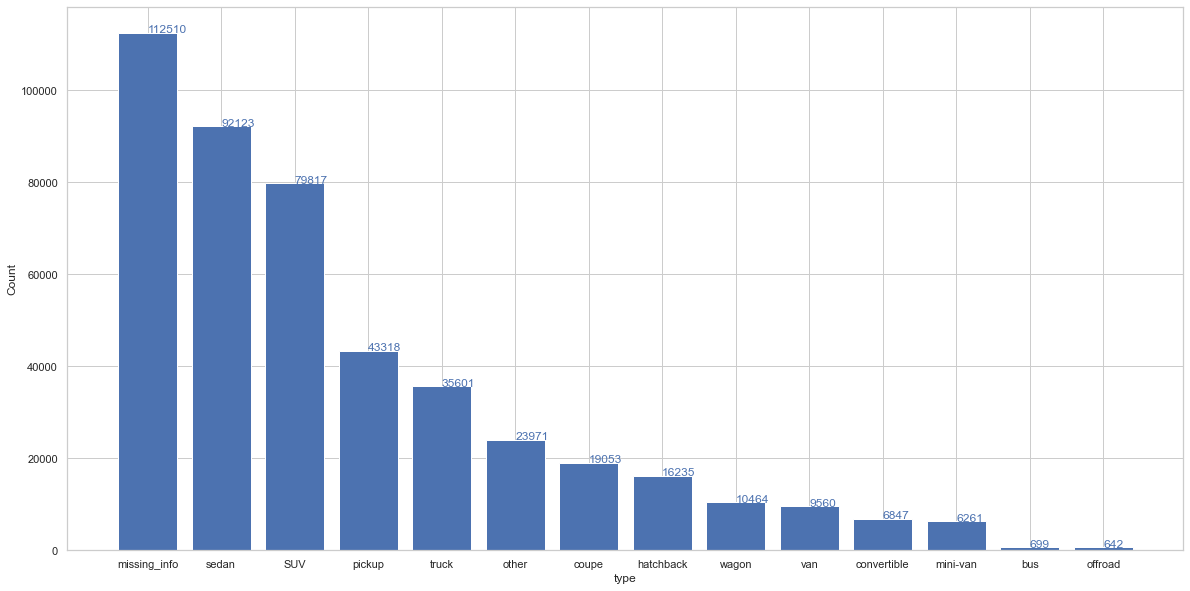

In [34]:
type = cars.type.replace(np.nan, 'missing_info')
plot_count_ver(type, 'type')

### Car color

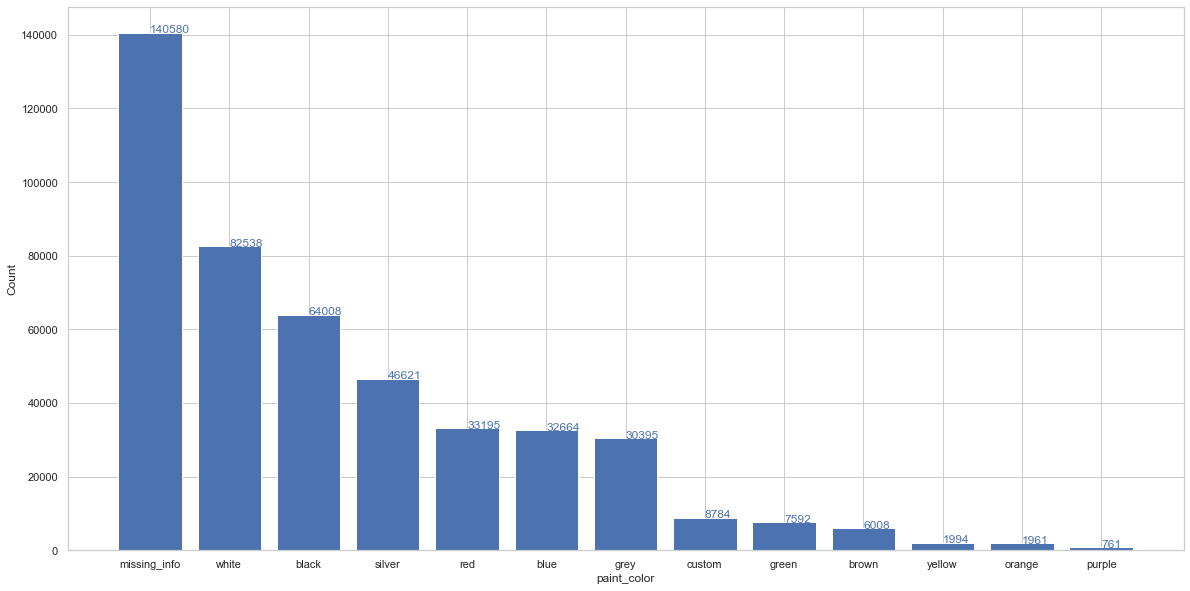

In [35]:
paint_color = cars.paint_color.replace(np.nan, 'missing_info')
plot_count_ver(paint_color, 'paint_color')

### State

In [36]:
def plot_count_hor(col, title):
    count = Counter(list(col))
    x, y = zip(*count.most_common())
    plt.figure(figsize=[14, 18])
    plt.barh(x, y, )
    for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
    
    plt.gca().invert_yaxis()
    plt.xlabel('Count')
    plt.ylabel(title)
    plt.grid(True, axis='y')
    plt.show()

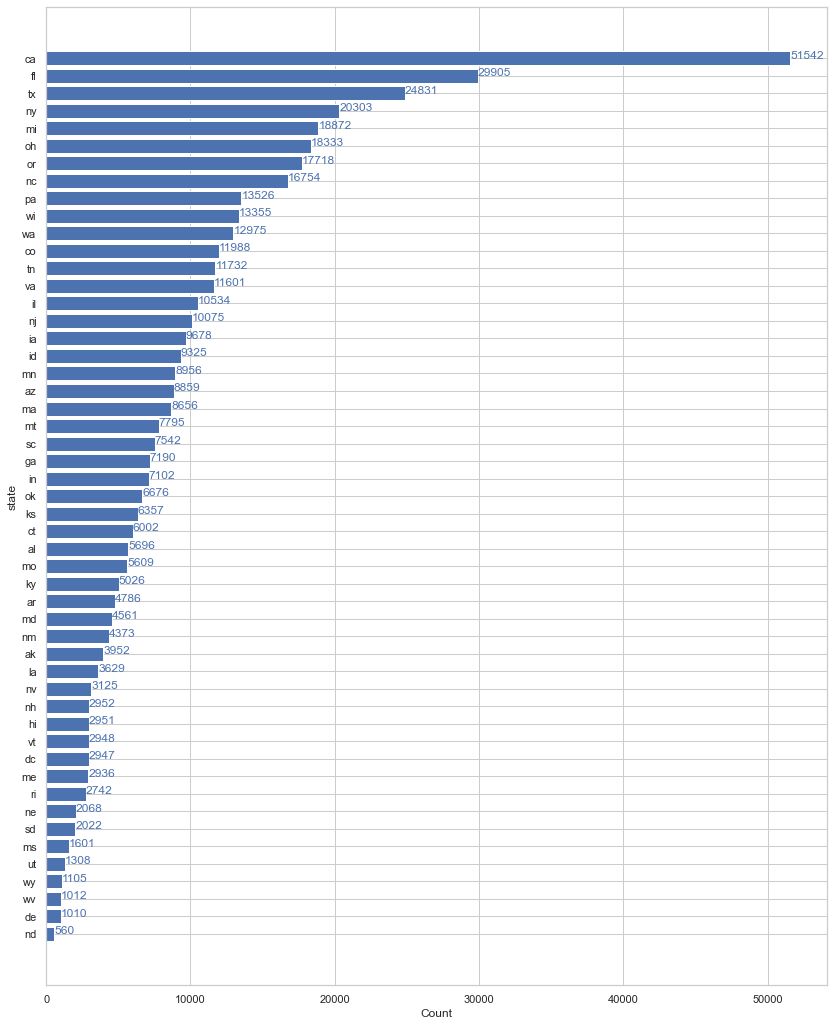

In [37]:
state = cars.state.replace(np.nan, 'missing_info')
plot_count_hor(state, 'state')

### Identify outliers

As we saw before, there are some records that mess up with the price distribution

In [38]:
def calculate_nth_percentile(f, to, step):
    for i in range(f, to, step):
        c = cars['price'].values
        c = np.sort(c, axis = None)
        print("{} percentile value is {}".format(i, c[int(len(c) * (float(i) / 100))]))
    print("{} percentile value is {}".format(to, c[-1])) 

In [39]:
calculate_nth_percentile(0, 100, 10)

0 percentile value is 0
10 percentile value is 670
20 percentile value is 3800
30 percentile value is 5950
40 percentile value is 7999
50 percentile value is 10995
60 percentile value is 14595
70 percentile value is 18600
80 percentile value is 24990
90 percentile value is 33500
100 percentile value is 3615215112


In [40]:
calculate_nth_percentile(90, 100, 1)

90 percentile value is 33500
91 percentile value is 34900
92 percentile value is 35990
93 percentile value is 36995
94 percentile value is 38835
95 percentile value is 39990
96 percentile value is 41998
97 percentile value is 45000
98 percentile value is 49998
99 percentile value is 59900
100 percentile value is 3615215112


The majority of cars (99%) have price under &#0036;60k, there are some records which have price = 0

#### Visualizing price outliers

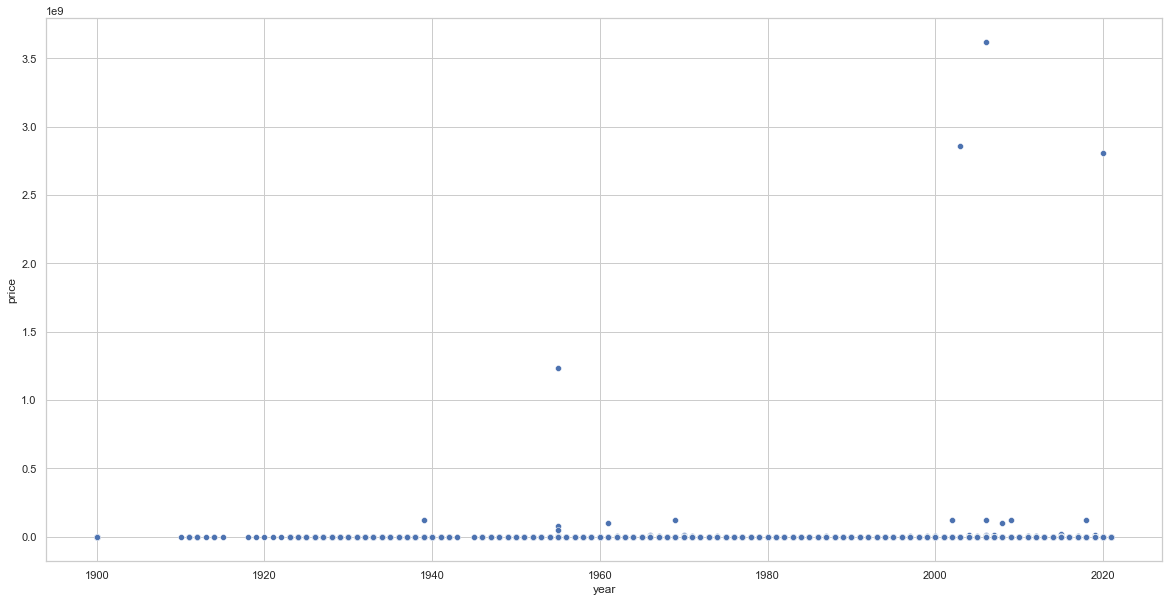

In [41]:
sns.scatterplot(data=cars, x="year", y="price")
plt.show()

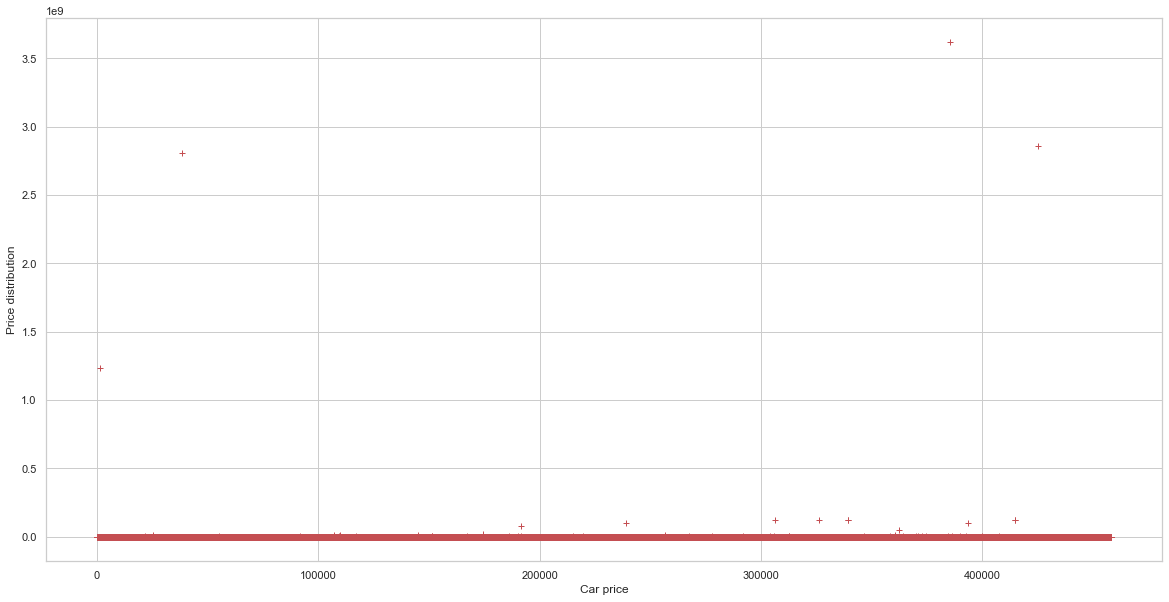

In [42]:
plt.plot(cars['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

#### Price over 0 and under 100k

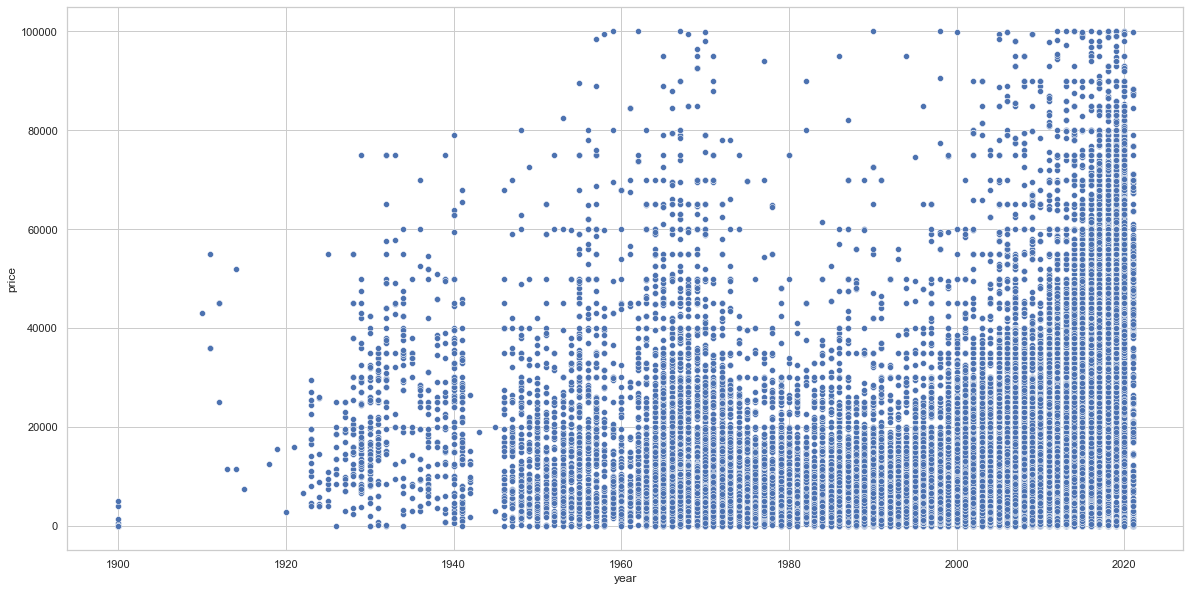

In [43]:
sns.scatterplot(data=cars_under_100_over_0, x="year", y="price")
plt.show()

#### Price Z-score

In [44]:
z = np.abs(stats.zscore(cars.price))
print("Number of records with z-score higher than 0.05: {}".format(len(np.where(z > 0.05)[0])))
print("Number of records with z-score lower than 0.05: {}".format(len(np.where(z < 0.05)[0])))

Number of records with z-score higher than 0.05: 57
Number of records with z-score lower than 0.05: 457044


In [45]:
cars_z_score = cars[z < 0.05]

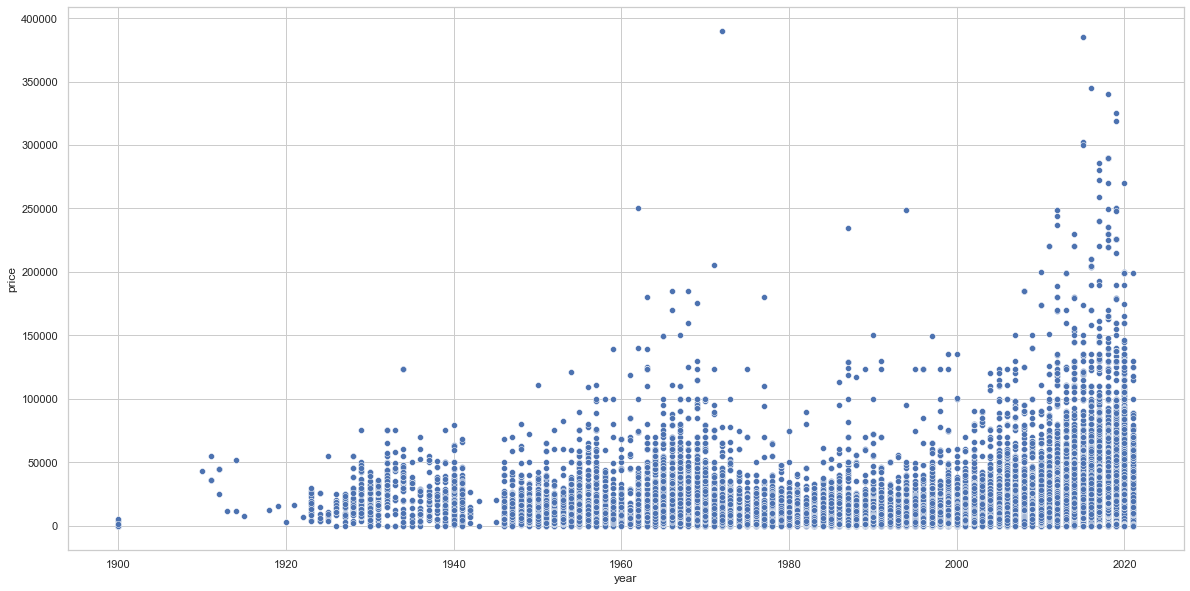

In [46]:
sns.scatterplot(data=cars_z_score, x="year", y="price")
plt.show()

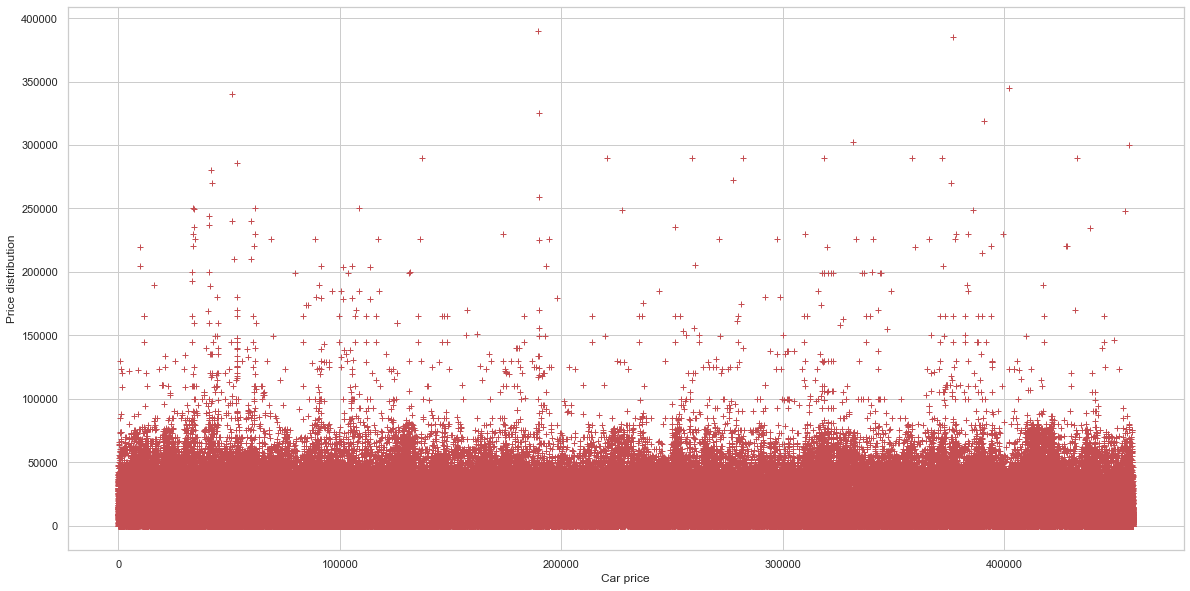

In [47]:
plt.plot(cars_z_score['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

#### Price IQR Score

In [48]:
q1 = cars.quantile(0.25)
q3 = cars.quantile(0.75)
iqr = q3 - q1

print(iqr)

id          228953.000000
price        16595.000000
year             8.000000
cylinders        6.000000
odometer     93058.000000
dtype: float64


In [49]:
tmp = (cars.price < (q1.price - 1.5 * iqr.price)) | (cars.price > (q3.price + 1.5 * iqr.price))
print("Number of records with IQR score indicating outlier: {}".format(len(np.where(tmp)[0])))

Number of records with IQR score indicating outlier: 12728


In [50]:
cars_iqr = cars[~((cars.price < (q1.price - 1.5 * iqr.price)) | (cars.price > (q3.price + 1.5 * iqr.price)))]

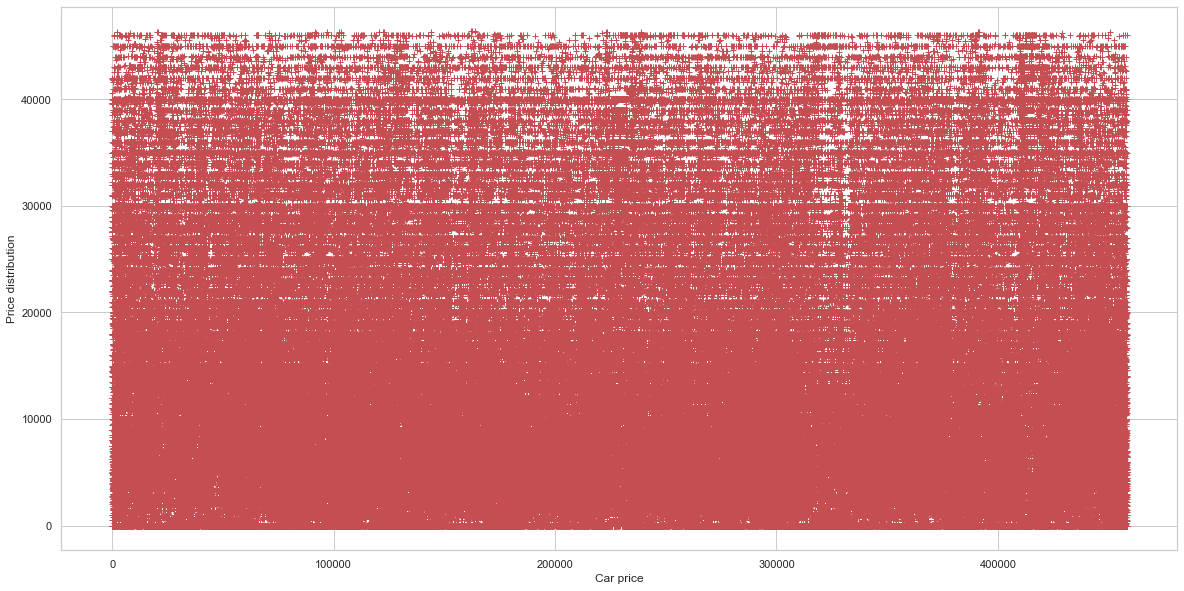

In [51]:
plt.plot(cars_iqr['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

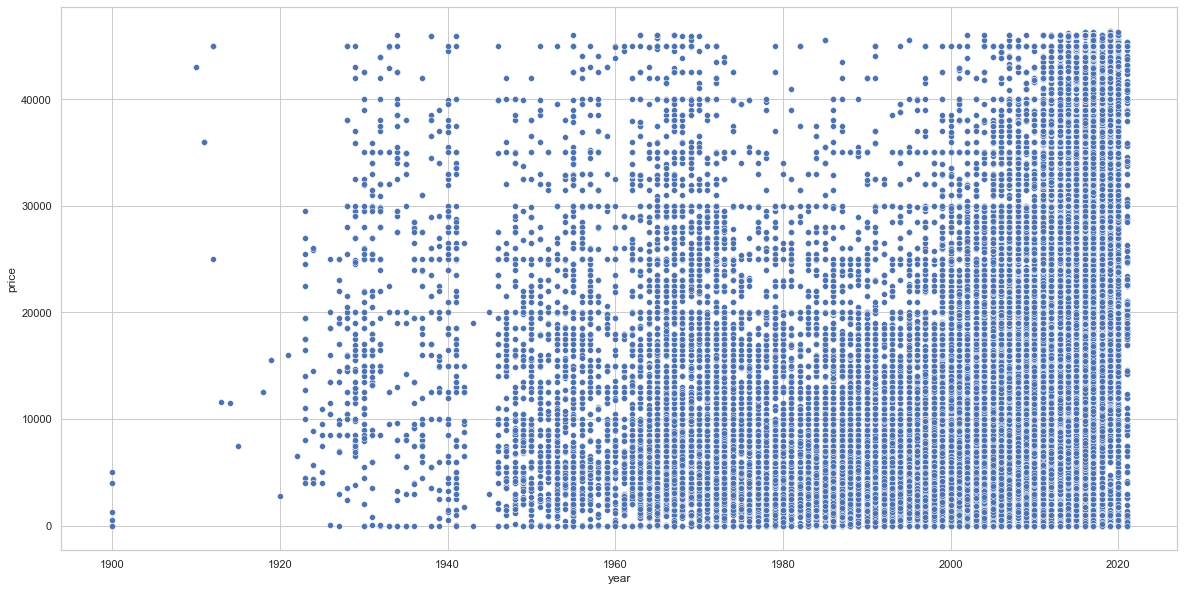

In [52]:
sns.scatterplot(data=cars_iqr, x="year", y="price")
plt.show()

#### Title outliers

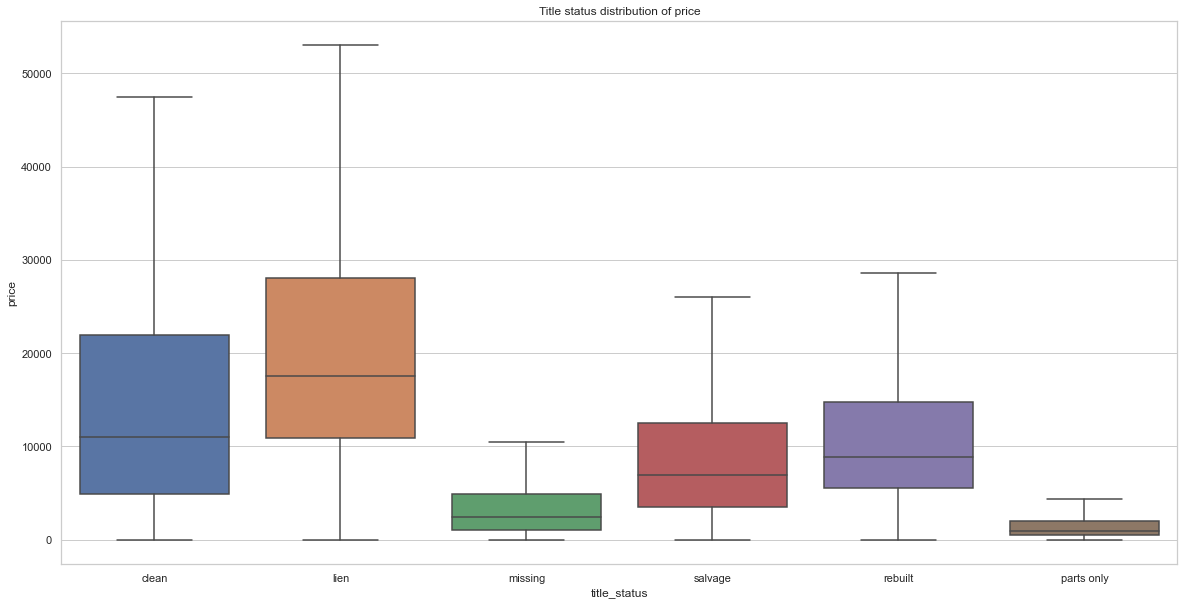

In [53]:
sns.set(style='whitegrid')
sns.boxplot(x='title_status', y='price', data=cars, showfliers=False)
plt.title('Title status distribution of price')
plt.show()

Missing titles and parts only will need to be removed

### Mean, variation, min, max

In [54]:
cars.describe()

,id,price,year,cylinders,odometer
count,457101.000000,457101.000000,456051.000000,457101.000000,401948.000000
mean,229157.609596,40481.004375,2010.749495,3.701974,101674.841171
std,132220.942921,8204560.012696,8.851148,3.133902,3232439.584969
min,0.000000,0.000000,1900.000000,0.000000,0.000000
25%,114687.000000,4900.000000,2008.000000,0.000000,40957.000000
50%,229187.000000,10995.000000,2013.000000,4.000000,87763.500000
75%,343640.000000,21495.000000,2016.000000,6.000000,134015.000000
max,458212.000000,3615215112.000000,2021.000000,12.000000,2043755555.000000


In [55]:
cars.var()

id             17482377746.842701
price       67314805001922.796875
year                    78.342823
cylinders                9.821344
odometer    10448665670471.998047
dtype: float64

### Covariance

In [56]:
cars.cov()

,id,price,year,cylinders,odometer
id,17482377746.842613,883838343.154104,7813.845526,-1132.463806,952599139.864382
price,883838343.154104,67314805001920.937500,-212715.342875,33197.885150,-222452087.645046
year,7813.845526,-212715.342875,78.342823,-2.698529,-268287.302148
cylinders,-1132.463806,33197.885150,-2.698529,9.821344,37208.616745
odometer,952599139.864382,-222452087.645046,-268287.302148,37208.616745,10448665670471.914062


### Correlation

In [57]:
corr = cars.corr()
corr

,id,price,year,cylinders,odometer
id,1.000000,0.000815,0.006678,-0.002733,0.002218
price,0.000815,1.000000,-0.002926,0.001291,-0.000012
year,0.006678,-0.002926,1.000000,-0.097267,-0.010661
cylinders,-0.002733,0.001291,-0.097267,1.000000,0.003734
odometer,0.002218,-0.000012,-0.010661,0.003734,1.000000


<AxesSubplot:>

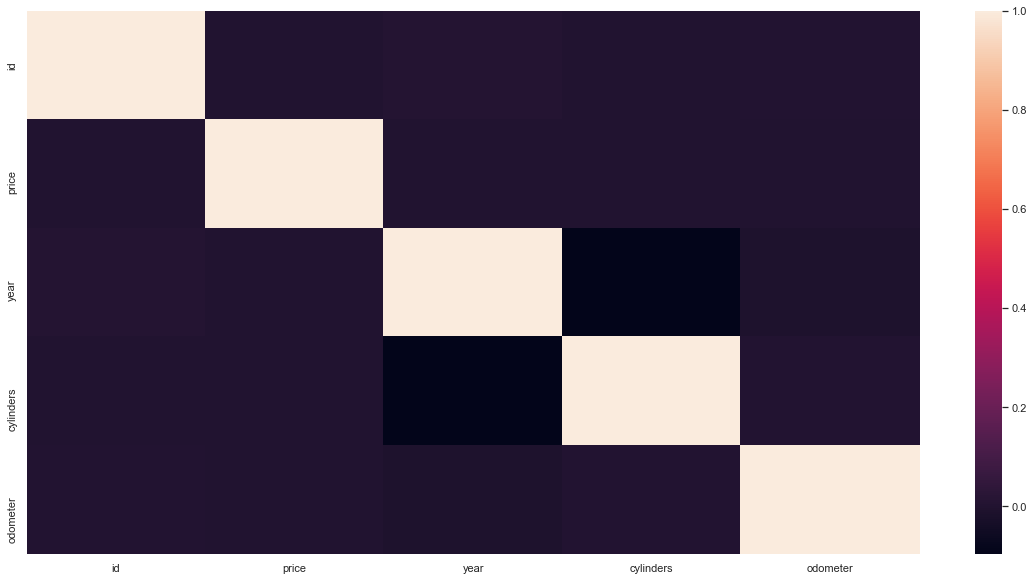

In [58]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Correlation for cars without outliers

#### Z-Score

<AxesSubplot:>

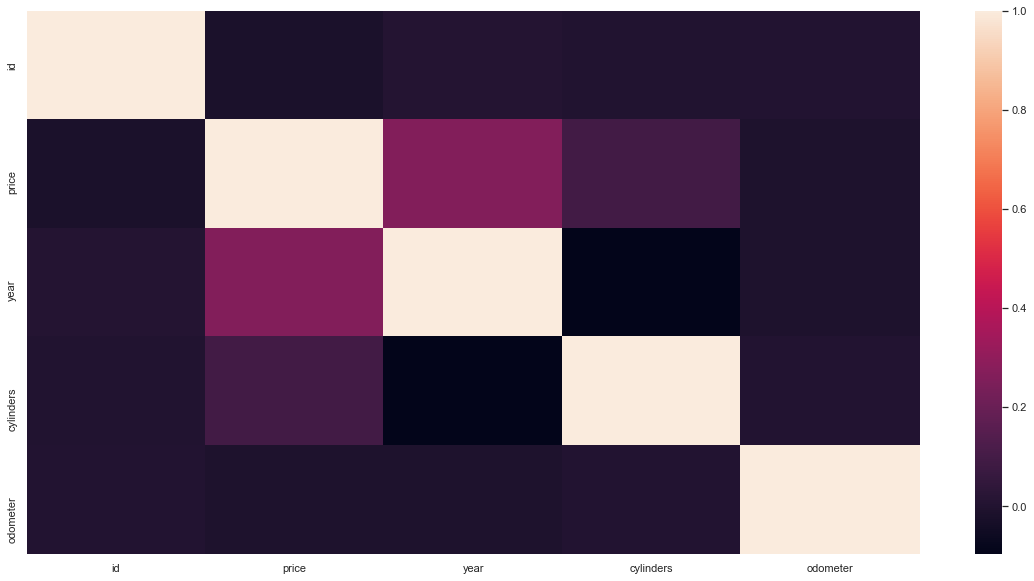

In [59]:
corr = cars_z_score.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#### IQR Score

<AxesSubplot:>

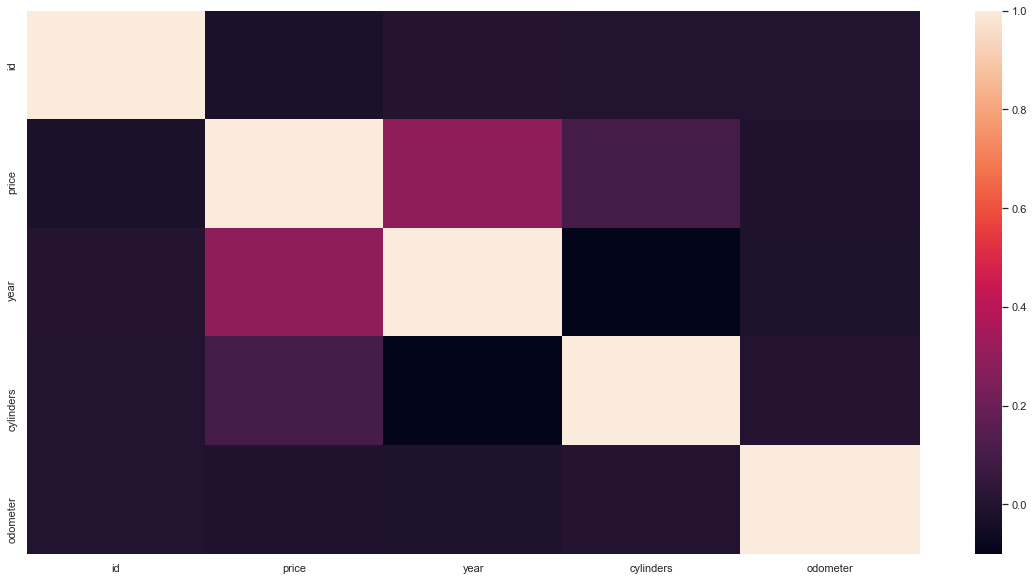

In [60]:
corr = cars_iqr.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Selecting best features 

I already removed:
- id, 
- url, 
- region_url, 
- VIN, 
- image_url, 
- description, 
- posting_date, 
- lat, 
- long

Based on previous counts i'm dropping 'size' as the majority of the records have this field missing, and id

In [61]:
new_cars = cars_z_score.copy()
drop_columns(new_cars, ['id', 'size'])

I'm also dropping paint_color, state, and region

In [62]:
drop_columns(new_cars, ['paint_color', 'state', 'region'])

We are left with:

In [63]:
new_cars.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
0,35990,2010.000000,chevrolet,corvette grand sport,good,8,gas,32742.000000,clean,other,rwd,other
1,7500,2014.000000,hyundai,sonata,excellent,4,gas,93600.000000,clean,automatic,fwd,sedan
2,4900,2006.000000,bmw,x3 3.0i,good,6,gas,87046.000000,clean,automatic,NaN,SUV
3,2000,1974.000000,chevrolet,c-10,good,4,gas,190000.000000,clean,automatic,rwd,pickup
4,19500,2005.000000,ford,f350 lariat,excellent,8,diesel,116000.000000,lien,automatic,4wd,pickup


### Processing dataset

I'm gonna be using the dataset after removing outliers with z-score higher than 0.05

The features I'm choosing are:
- year
- manufacturer
- condition
- cylinders
- odometer

Removing cars with titles other than clean/lien and price == 0

In [64]:
new_cars = new_cars[(new_cars.title_status == 'clean') | (new_cars.title_status == 'lien')]
new_cars = new_cars[new_cars.price > 0]

In [65]:
drop_columns(new_cars, ['model',  'fuel', 'title_status', 'transmission', 'drive', 'type'])

In [66]:
new_cars.head()

,price,year,manufacturer,condition,cylinders,odometer
0,35990,2010.000000,chevrolet,good,8,32742.000000
1,7500,2014.000000,hyundai,excellent,4,93600.000000
2,4900,2006.000000,bmw,good,6,87046.000000
3,2000,1974.000000,chevrolet,good,4,190000.000000
4,19500,2005.000000,ford,excellent,8,116000.000000


In [67]:
new_cars.to_csv('cars.csv')

### Handling missing data

(-10000.0, 120000.0)

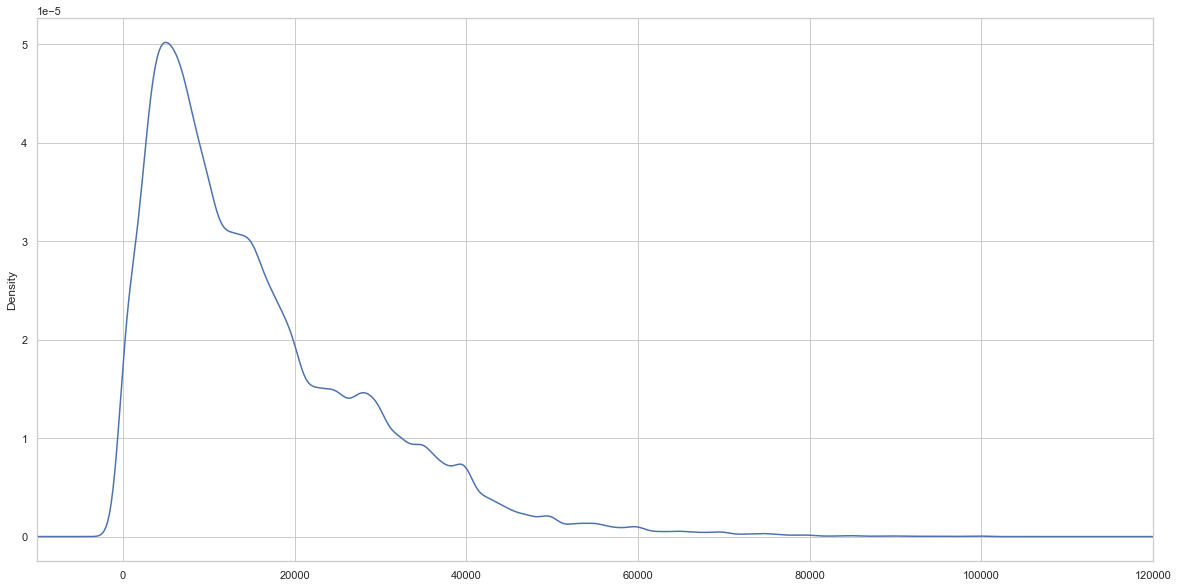

In [68]:
cars_under_100_over_0.price.plot.kde()
plt.xlim(-10000, 120000)